In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r'C:\Users\nirma\Downloads/database.sqlite')

In [4]:
df = pd.read_sql_query('SELECT * FROM REVIEWS', con)

In [5]:
df.shape

(568454, 10)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
df['HelpfulnessNumerator']>df['HelpfulnessDenominator']

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [9]:
df_valid = df[df['HelpfulnessNumerator']<=df['HelpfulnessDenominator']]

In [10]:
df_valid.shape

(568452, 10)

In [11]:
data = df_valid[~df_valid[['UserId','ProfileName','Time','Text']].duplicated()]

In [12]:
data.shape

(393931, 10)

In [13]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [14]:
data['Time'] =pd.to_datetime(data['Time'], unit ='s')

C:\Users\nirma\AppData\Local\Temp\ipykernel_18204\3567249847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] =pd.to_datetime(data['Time'], unit ='s')


In [15]:
data['ProfileName'].unique()

array(['delmartian', 'dll pa', 'Natalia Corres "Natalia Corres"', ...,
       'Lettie D. Carter', 'pksd "pk_007"', 'srfell17'], dtype=object)

In [16]:
data['ProfileName'].nunique()

218418

In [17]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId', ascending = False)

In [18]:
recommend_df.columns = ['Number_of_summaries','num_text','avg_score','No_of_prods_purchased']

In [19]:
recommend_df.index[1:10]

Index(['A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY', 'A1Z54EM24Y40LL',
       'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU', 'AKMEY1BSHSDG7',
       'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [20]:
recommend_df['No_of_prods_purchased'][1:10].values

array([278, 259, 214, 211, 161, 146, 129, 119, 118], dtype=int64)

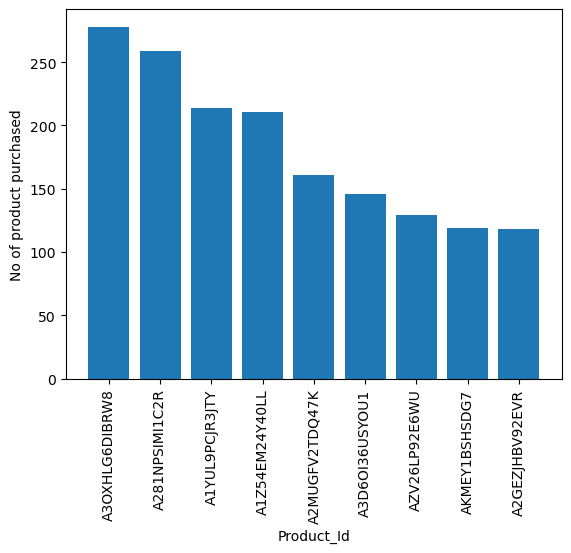

In [21]:
plt.bar(recommend_df.index[1:10],recommend_df['No_of_prods_purchased'][1:10].values)
plt.xticks(rotation = 'vertical')
plt.xlabel('Product_Id')
plt.ylabel('No of product purchased')
plt.show()

In [22]:
prod_count = data['ProductId'].value_counts().to_frame()

In [23]:
freq_prod_id = prod_count[prod_count['count']>500]

In [24]:
freq_prod_id.index

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [25]:
fre_prod_df = data[data['ProductId'].isin(freq_prod_id.index)]

In [26]:
fre_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


<AxesSubplot:xlabel='count', ylabel='ProductId'>

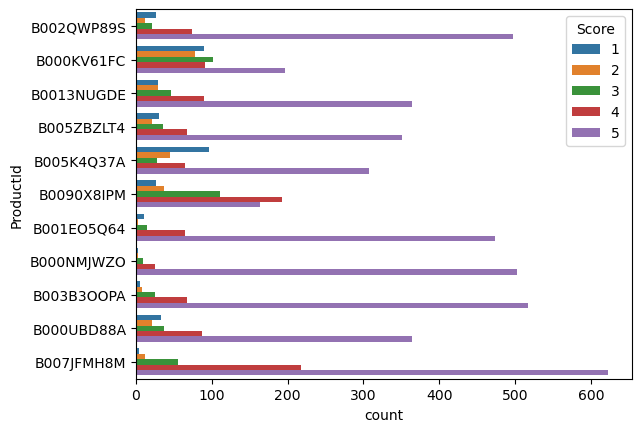

In [27]:
sns.countplot(y='ProductId', data = fre_prod_df, hue = 'Score')

In [50]:
x=data['UserId'].value_counts()
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
AAQPR1MSRXKTU       1
AGO81Z6PZSF7P       1
ALA84XWMTQBFT       1
A1G9DK8EUR36JC      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [29]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [51]:
data['viewer_type']=data['UserId'].apply(lambda user:'Freq' if x[user]>50 else 'Not Frequent' )

C:\Users\nirma\AppData\Local\Temp\ipykernel_18204\1058950107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['viewer_type']=data['UserId'].apply(lambda user:'Freq' if x[user]>50 else 'Not Frequent' )


In [57]:
data['viewer_type'].unique()

array(['Not Frequent', 'Freq'], dtype=object)

In [61]:
not_freq_df = data[data['viewer_type']=='Not Frequent']

In [63]:
freq_df = data[data['viewer_type']=='Freq']

In [65]:
freq_df['Score'].value_counts()

Score
5    5765
4    1979
3     897
2     368
1     349
Name: count, dtype: int64

<AxesSubplot:xlabel='Score'>

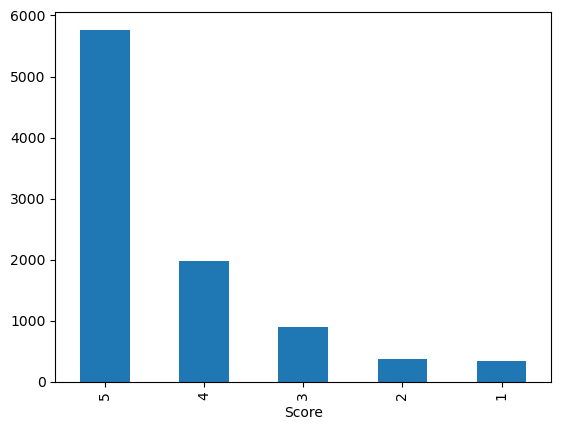

In [69]:
freq_df['Score'].value_counts().plot(kind ='bar')